In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Data

loading in the data:

In [30]:
df = pd.read_csv("data/titanic/train.csv")
test = pd.read_csv("data/titanic/test.csv")

print(df.shape)
df.head()

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


now to understand it a bit before cleaning it up:

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


Taking a quick look at the obvious classes:

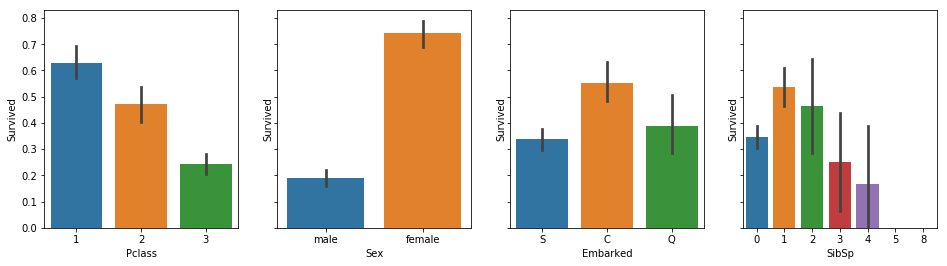

In [31]:
cats = ["Pclass", "Sex", "Embarked", "SibSp"]
fig, axes = plt.subplots(1,len(cats), figsize=(16,4), sharey=True)

for ax, cat in zip(axes.flat, cats):
    sns.barplot(df[cat], df['Survived'], ax=ax)

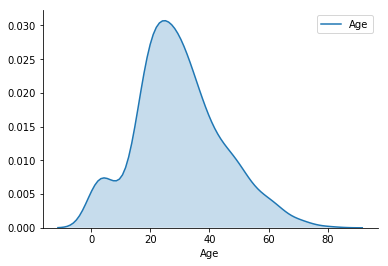

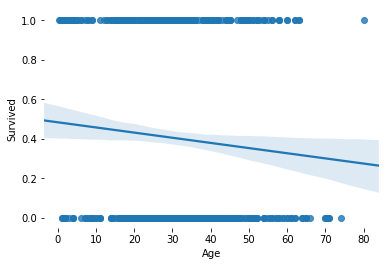

In [20]:
sns.kdeplot(df['Age'].dropna(), shade=True)
plt.xlabel("Age")
sns.despine()
plt.show()
sns.regplot(x="Age", y="Survived", data=df)
sns.despine(left=True, bottom=True);

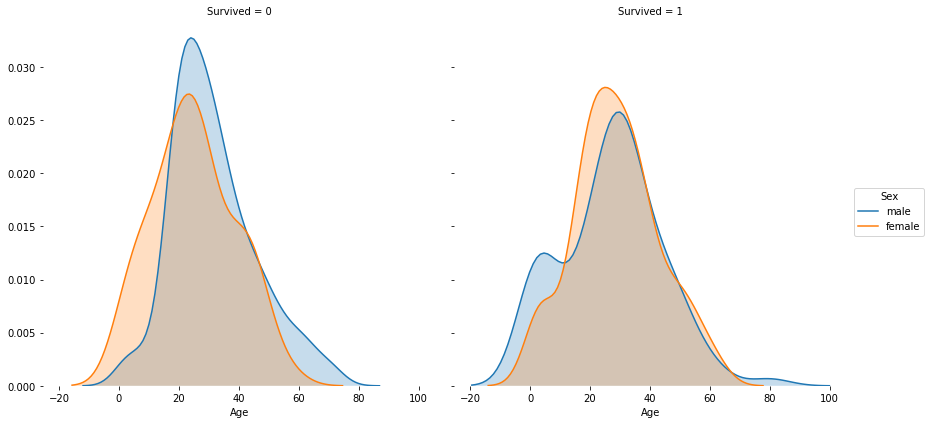

In [46]:
g = sns.FacetGrid(df, col="Survived", hue="Sex", size=6)
# For each subset of values, generate a kernel density plot of the "Age" columns.
g.map(sns.kdeplot, "Age", shade=True)
g.add_legend()
sns.despine(left=True, bottom=True);

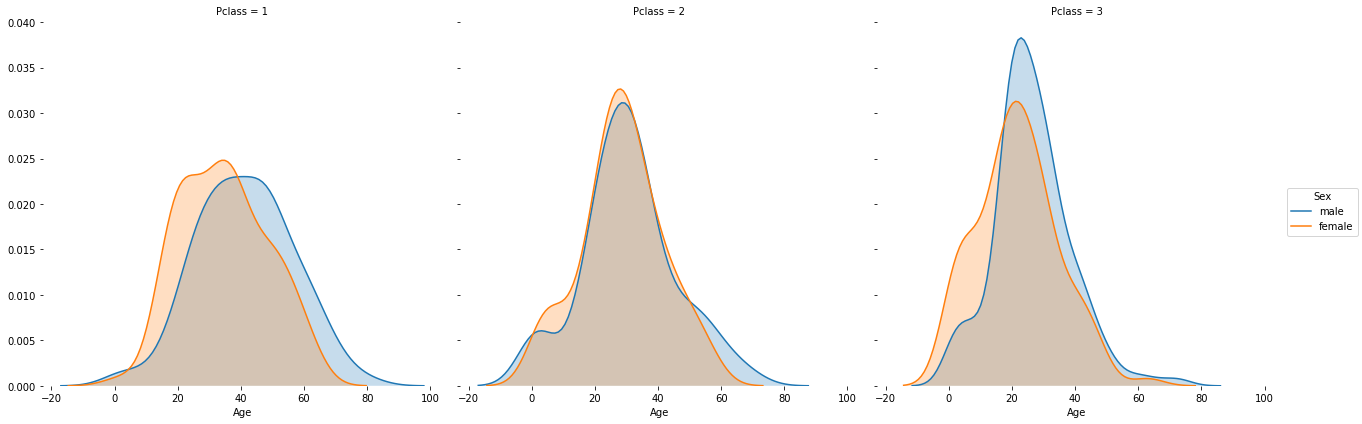

In [40]:
g = sns.FacetGrid(df, col="Pclass", hue="Sex", size=6)
g.map(sns.kdeplot, "Age", shade=True)
g.add_legend()
sns.despine(left=True, bottom=True);

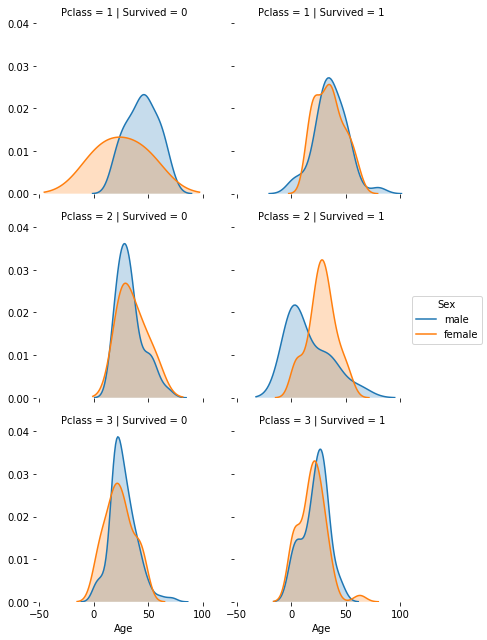

In [39]:
g = sns.FacetGrid(df, col="Survived", row="Pclass", hue="Sex", size=3)
g.map(sns.kdeplot, "Age", shade=True)
g.add_legend()
sns.despine(left=True, bottom=True);

Lets take a look at the cabins - so its missing for almost 80% of the rows, so I'm going to ignore this column. One thing which stands out is that the first letter seems to correspond to the deck:

In [9]:
set([str(c)[0] for c in df["Cabin"].values if c is not np.nan])

{'A', 'B', 'C', 'D', 'E', 'F', 'G', 'T'}

In [10]:
def get_first_letter(x):
    if type(x) is str:
        return str(x)[0]
    else:
        return "N"
    
set(df["Cabin"].apply(get_first_letter))

{'A', 'B', 'C', 'D', 'E', 'F', 'G', 'N', 'T'}

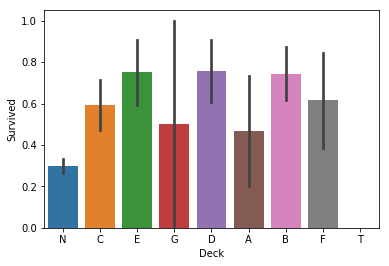

In [11]:
df["Deck"] = df["Cabin"].apply(get_first_letter)
sns.barplot(df["Deck"], df["Survived"]);

Interesting, as this does show correlations, although I'm not sure about the missing values.